In [3]:
# I implemented Long Short-Term Memory, an artificial recurrent neural network model, 
# to predict the closing stock prices of any corporation. For this example, I am predicting
# the closing stock prices of IBM.


In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import math
import matplotlib.pyplot as plt
plt.style.use('default')

import pandas as pd
pd.options.mode.chained_assignment = None
import pandas_datareader as pd
import numpy as np


Using TensorFlow backend.


In [5]:
# Get the financial data of the corporation
fin_data = pd.DataReader('IBM', data_source='yahoo', start='2010-01-01', end='2020-01-01')

# Get only the 'Close' column
close_data = fin_data.filter(['Close'])
npy_close_data = close_data.values
train_length = math.floor( .75 * len(npy_close_data) )

# Scale the data using StandardScaler before using the data for our model
sc = StandardScaler()
sc = sc.fit(npy_close_data)
sc_data = sc.transform(npy_close_data)


In [6]:
# Independent training features
x_train_data = []

# Dependent variables
y_train_data = []

train_data = sc_data

window_size = 100

# Append last window_size values to x_train_data every iteration
# We have a sliding window of window_size points that shifts by 1 index after each iteration
for i in range(window_size, len(train_data)):

  # We're getting the last window_size values to predict the window_size+1 value
  x_train_data.append(train_data[i-window_size:i])

  # We're getting the window_size+1 value so we can measure how good our prediction was
  y_train_data.append(train_data[i])
    

In [7]:
# Convert to numpy arrays so we can use them to train model
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

# Before the statement below is executed, x_train_data is 2D    
# Reshape the data because a LSTM network expects input to be 3D in the form of: # of samples, # of timesteps, # of features

                                                  # of samples,      # of timesteps,  # of features
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))


In [8]:
# Create instance of Sequential class
model = Sequential()

# Add 100 neurons to the LSTM layer
# We need to specify the input shape which is the number of timesteps (x_train.shape[1]) and number of features (1)
model.add(LSTM(100, input_shape=(x_train_data.shape[1], 1)))

# The dense layer helps us output the prediction
model.add(Dense(1))


In [9]:
# Use stochastic gradient descent to train the model
# Use mean_squared_error as the loss function
model.compile(optimizer='sgd', loss='mse')

# Train the model using the backpropagation algorithm
# batch_size is the number of training examples the network is exposed to before the weights are updated within an epoch
model.fit(x_train_data, y_train_data, batch_size=5, epochs=10, verbose=0)


In [10]:
# Evaluate the network and observe the loss
loss = model.evaluate(x_train_data, y_train_data, verbose=0)
print(loss)

x_test_data = []

# y_test_data are all values we want the model to predict
y_test_data = npy_close_data[train_length:]

window_size = 100
test_data = sc_data[train_length - window_size: , :]

for i in range(window_size, len(test_data)):
    x_test_data.append(test_data[i-window_size:i])


0.011391864267689799


In [11]:
x_test_data = np.array(x_test_data)

# Before the statement below is executed, x_train_data is 2D    
# Reshape the data because a LSTM network expects input to be 3D in the form of: # of samples, # of timesteps, # of features

                                                  # of samples,      # of timesteps,  # of features
x_test_data = np.reshape(x_test_data, (x_test_data.shape[0], x_test_data.shape[1], 1))

In [12]:
# Get the model's predicted values
predictions = model.predict(x_test_data)

# Unscale the values
# We want predictions to be the same as y_test_data
predictions = sc.inverse_transform(predictions)

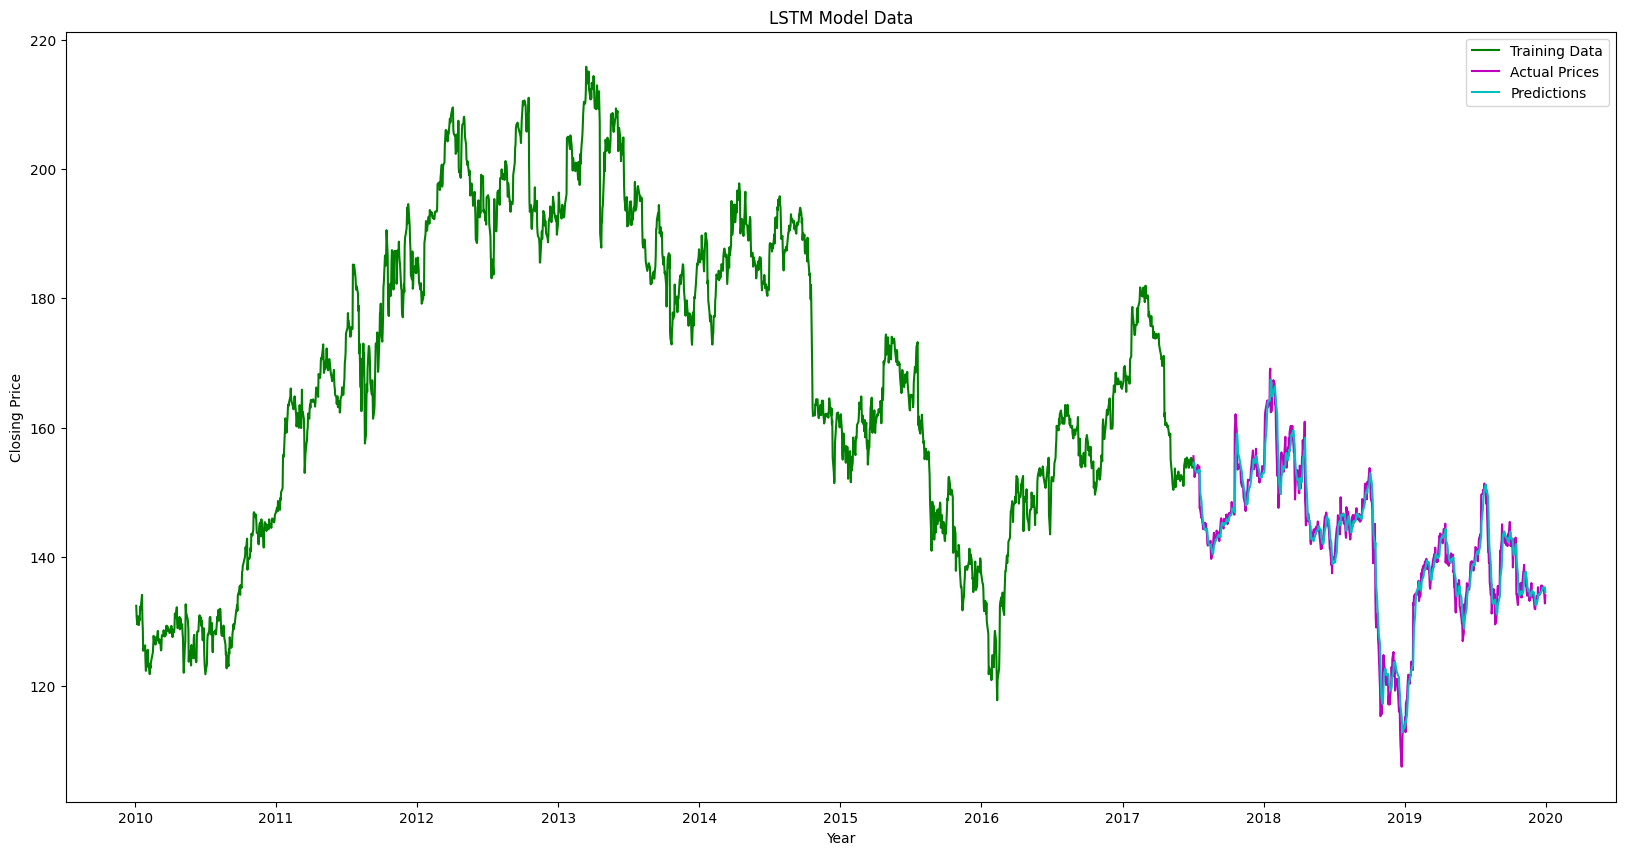

In [13]:
# Visualize the data
plt.figure(figsize=(20,10))
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('LSTM Model Data')

data = close_data[:train_length]
all_data = close_data[train_length:]
all_data['Predictions'] = predictions

plt.plot(data['Close'], color='g')
plt.plot(all_data[['Close']], color='m')
plt.plot(all_data[['Predictions']], color='c')

plt.legend(['Training Data', 'Actual Prices', 'Predictions'])